# Exploratory Analysis on which cities has the most volatile markets
### Andrew's File

In [1]:
# Dependencies
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

# Custom Scripts
import project1scripts as custom

warnings.filterwarnings('ignore')

In [2]:
# Loading cleaned dataframe
df_main = pd.read_csv('clean_median_sale_price_v2_df.csv')
df_main = df_main.iloc[:, 1:]
df_main.head(10)

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517.0,342000.0,356000.0,371000.0,380667.0,...,543333.0,528333.0,518333.0,515333.0,509500.0,510333.0,516667.0,535833.0,558333.0,579667.0
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667.0,450667.0,465000.0,468333.0,471667.0,...,852000.0,840333.0,827000.0,818333.0,816667.0,827333.0,839000.0,854000.0,873333.0,888333.0
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218.0,183385.0,197833.0,207500.0,212333.0,...,285000.0,278333.0,273333.0,270000.0,269000.0,275633.0,287300.0,300300.0,313167.0,319833.0
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500.0,172800.0,178467.0,181633.0,181125.0,...,390500.0,382500.0,373333.0,363333.0,362333.0,367000.0,377000.0,384667.0,395000.0,400333.0
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155.0,167417.0,174900.0,177650.0,178650.0,...,321000.0,316000.0,310667.0,306000.0,304333.0,306333.0,313333.0,321667.0,328667.0,333667.0
5,"Washington, DC",VA,323667.0,320000.0,325000.0,340000.0,358333.0,374439.0,380949.0,379282.0,...,486417.0,478083.0,472250.0,460417.0,462083.0,475667.0,502733.0,526067.0,543317.0,546667.0
6,"Philadelphia, PA",PA,201567.0,195417.0,193750.0,197500.0,208000.0,219667.0,229667.0,233333.0,...,321133.0,316133.0,312467.0,308000.0,303000.0,305000.0,310667.0,322333.0,337333.0,350000.0
7,"Miami, FL",FL,163333.0,161667.0,162333.0,169333.0,178000.0,187667.0,195000.0,199667.0,...,413333.0,411667.0,408333.0,408667.0,413667.0,425333.0,436333.0,445800.0,455800.0,458800.0
8,"Atlanta, GA",GA,141918.0,145000.0,150500.0,161833.0,173500.0,180833.0,187467.0,185433.0,...,361833.0,355167.0,351167.0,344333.0,343933.0,347600.0,358267.0,367000.0,377333.0,383333.0
9,"Boston, MA",MA,315667.0,308333.0,305333.0,316000.0,330000.0,350667.0,361117.0,367783.0,...,606667.0,596667.0,586333.0,576667.0,560000.0,571417.0,593917.0,627417.0,652667.0,670167.0


In [3]:
df_pct = df_main.iloc[:,2:].pct_change(axis=1)
df_pct

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,NaN,-0.016123,-0.011787,-0.005466,0.025435,0.040936,0.042135,0.026057,-0.006788,-0.023804,...,-0.029442,-0.027607,-0.018927,-0.005788,-0.011319,0.001635,0.012412,0.037095,0.041991,0.038210
1,NaN,0.008459,0.025168,0.057285,0.046440,0.031804,0.007168,0.007119,-0.006360,-0.007114,...,-0.013127,-0.013694,-0.015866,-0.010480,-0.002036,0.013060,0.014102,0.017878,0.022638,0.017176
2,NaN,-0.029681,0.014038,0.062415,0.077354,0.078785,0.048864,0.023292,-0.033749,-0.048741,...,-0.033898,-0.023393,-0.017964,-0.012194,-0.003704,0.024658,0.042328,0.045249,0.042847,0.021286
3,NaN,0.003297,0.020806,0.059015,0.050456,0.032795,0.017740,-0.002797,-0.016563,-0.024326,...,-0.020893,-0.020487,-0.023966,-0.026786,-0.002752,0.012880,0.027248,0.020337,0.026862,0.013501
4,NaN,-0.008416,0.012337,0.064825,0.045344,0.044697,0.015723,0.005629,-0.021366,-0.021924,...,-0.026290,-0.015576,-0.016877,-0.015023,-0.005448,0.006572,0.022851,0.026598,0.021762,0.015213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,NaN,-0.068067,0.253566,-0.009460,0.059104,-0.054538,0.113278,-0.046056,0.021753,-0.054943,...,0.031965,0.030594,-0.037144,-0.069367,0.000209,-0.028982,-0.025582,0.056663,0.084933,0.087785
471,NaN,-0.072464,-0.081164,-0.127539,-0.012994,-0.037300,-0.014246,-0.023119,-0.082843,0.005950,...,-0.042451,0.028499,-0.060961,0.045903,-0.021004,0.030419,-0.021751,0.002222,0.001586,-0.003482
472,NaN,0.019694,0.012876,-0.042369,0.058075,0.050183,0.137382,0.030197,-0.016996,-0.064823,...,-0.049398,0.008185,0.018263,0.001992,-0.051313,-0.127882,0.029807,0.109711,0.109381,0.059916
473,NaN,0.081559,0.022241,-0.029010,-0.041165,-0.068994,0.018885,-0.043899,0.048100,-0.011005,...,-0.041022,0.016523,0.022576,0.040344,-0.000340,-0.075571,0.033356,-0.044089,0.027152,-0.021184


In [4]:
df_cities = pd.read_csv('cities_index.csv')
df_cities = df_cities.iloc[:,1:]
df_cities.head()

,RegionName,StateName
0,"New York, NY",NY
1,"Los Angeles, CA",CA
2,"Chicago, IL",IL
3,"Dallas, TX",TX
4,"Houston, TX",TX


In [5]:
# Concat cities and drop empty column
df_pct = pd.concat([df_cities, df_pct], axis=1).drop('1/31/2013', axis=1)

In [6]:
df_pct.head()

,RegionName,StateName,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,-0.016123,-0.011787,-0.005466,0.025435,0.040936,0.042135,0.026057,-0.006788,...,-0.029442,-0.027607,-0.018927,-0.005788,-0.011319,0.001635,0.012412,0.037095,0.041991,0.038210
1,"Los Angeles, CA",CA,0.008459,0.025168,0.057285,0.046440,0.031804,0.007168,0.007119,-0.006360,...,-0.013127,-0.013694,-0.015866,-0.010480,-0.002036,0.013060,0.014102,0.017878,0.022638,0.017176
2,"Chicago, IL",IL,-0.029681,0.014038,0.062415,0.077354,0.078785,0.048864,0.023292,-0.033749,...,-0.033898,-0.023393,-0.017964,-0.012194,-0.003704,0.024658,0.042328,0.045249,0.042847,0.021286
3,"Dallas, TX",TX,0.003297,0.020806,0.059015,0.050456,0.032795,0.017740,-0.002797,-0.016563,...,-0.020893,-0.020487,-0.023966,-0.026786,-0.002752,0.012880,0.027248,0.020337,0.026862,0.013501
4,"Houston, TX",TX,-0.008416,0.012337,0.064825,0.045344,0.044697,0.015723,0.005629,-0.021366,...,-0.026290,-0.015576,-0.016877,-0.015023,-0.005448,0.006572,0.022851,0.026598,0.021762,0.015213


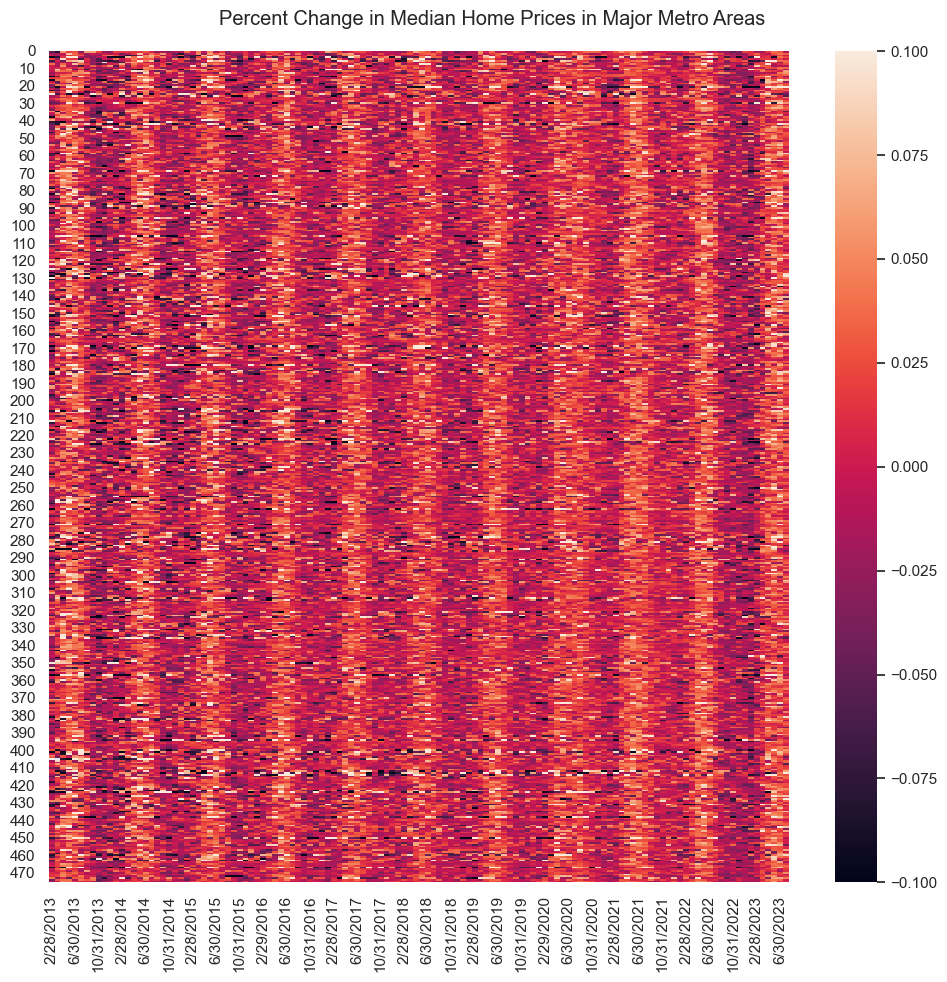

In [7]:
# Randomize Dataset
df_pct_fract = df_pct.copy().sample(frac=1).reset_index(drop=True)
# Draw a heatmap with the numeric values in each cell
sns.set_theme()
f, ax = plt.subplots(figsize=(10, 10))
f.suptitle("Percent Change in Median Home Prices in Major Metro Areas")
sns.heatmap(df_pct_fract.iloc[:,2:], fmt='d', linewidths=0, ax=ax)
plt.tight_layout()
f.savefig('Images/Volatility/variability_heatmap.svg', dpi=144, bbox_inches='tight')

In [8]:
# Split data into 5 regions:
df_ne_pct, df_se_pct, df_mw_pct, df_w_pct, df_sw_pct = custom.split_regions(df_pct)
df_ne_pct.head()
df_all_regions_pct = [df_ne_pct, df_se_pct, df_mw_pct, df_w_pct, df_sw_pct]

# Capture list of cities:
ne_names = df_ne_pct.iloc[:, 0]
se_names = df_se_pct.iloc[:, 0]
mw_names = df_mw_pct.iloc[:, 0]
w_names = df_w_pct.iloc[:, 0]
sw_names = df_sw_pct.iloc[:, 0]
df_all_region_names = [ne_names, se_names, mw_names, w_names, sw_names]

In [9]:
# Transpose table so observations are on the rows
df_ne_pct = df_ne_pct.transpose()
df_se_pct = df_se_pct.transpose()
df_mw_pct = df_mw_pct.transpose()
df_w_pct = df_w_pct.transpose()
df_sw_pct = df_sw_pct.transpose()

In [10]:
# Clean and change column indexes
df_ne_pct.columns = ne_names
df_se_pct.columns = se_names
df_mw_pct.columns = mw_names
df_w_pct.columns = w_names
df_sw_pct.columns = sw_names

# Drop State Abbreviations
df_ne_pct = df_ne_pct.iloc[2:, :]
df_se_pct = df_se_pct.iloc[2:, :]
df_mw_pct = df_mw_pct.iloc[2:, :]
df_w_pct = df_w_pct.iloc[2:, :]
df_sw_pct = df_sw_pct.iloc[2:, :]

In [11]:
df_ne_pct.head()

RegionName,"New York, NY","Philadelphia, PA","Boston, MA","Pittsburgh, PA","Providence, RI","Hartford, CT","Buffalo, NY","Rochester, NY","Worcester, MA","Bridgeport, CT",...,"Corning, NY","Sunbury, PA","New Castle, PA","Indiana, PA","Plattsburgh, NY","Olean, NY","Auburn, NY","Keene, NH","Somerset, PA","Laconia, NH"
2/28/2013,-0.016123,-0.030511,-0.023233,-0.002,-0.023047,-0.029588,-0.016172,-0.014514,-0.002225,-0.025901,...,-0.039799,-0.041162,-0.082333,0.017454,0.043286,-0.083876,-0.06618,-0.059762,0.066843,-0.06185
3/31/2013,-0.011787,-0.00853,-0.00973,0.018701,-0.012671,-0.034073,-0.012937,0.016988,0.025845,-0.031339,...,-0.019193,-0.110214,0.007006,-0.150631,-0.029726,-0.101093,-0.131203,0.009431,-0.107417,-0.028844
4/30/2013,-0.005466,0.019355,0.034936,0.033364,0.017703,0.022048,0.013881,0.021022,0.028671,0.048038,...,0.097087,-0.008439,-0.114269,-0.07024,0.00817,0.003977,0.158723,-0.005499,-0.095983,0.029911
5/31/2013,0.025435,0.053165,0.044304,0.041881,0.043476,0.055216,0.021904,0.030675,0.034206,0.075772,...,-0.026921,0.126526,0.149721,0.083286,-0.049092,0.014773,0.136476,0.109174,-0.098263,0.072093
6/30/2013,0.040936,0.056091,0.062627,0.034599,0.064,0.065416,0.047337,0.026452,0.0441,0.086958,...,0.066732,0.090492,0.05528,0.120293,0.029827,0.04721,0.008721,0.01893,0.11863,0.038231


In [12]:
# Plotting NE sector
# fig1, ax1 = plt.subplots(5,1, figsize=(20,40))
# ax1[0].boxplot(df_ne_pct)
# ax1[0].set_xticklabels(df_ne_pct.columns, rotation=90)
# ax1[0].set_ylim(-0.3, 0.3)
# ax1[0].set_ylabel("% Change")
# ax1[0].set_title("Price changes in SE Corridor")
# ax1[1].boxplot(df_se_pct)
# ax1[1].set_xticklabels(df_se_pct.columns, rotation=90)
# ax1[1].set_ylim(-0.3, 0.3)
# ax1[1].set_ylabel("% Change")
# ax1[1].set_title("Price changes in SE Corridor")
# ax1[2].boxplot(df_mw_pct)
# ax1[2].set_xticklabels(df_mw_pct.columns, rotation=90)
# ax1[2].set_ylim(-0.3, 0.3)
# ax1[2].set_ylabel("% Change")
# ax1[3].set_title("Price changes in MW Corridor")
# ax1[3].boxplot(df_w_pct)
# ax1[3].set_xticklabels(df_w_pct.columns, rotation=90)
# ax1[3].set_ylim(-0.3, 0.3)
# ax1[3].set_ylabel("% Change")
# ax1[3].set_title("Price changes in Western Corridor")
# ax1[4].boxplot(df_sw_pct)
# ax1[4].set_xticklabels(df_sw_pct.columns, rotation=90)
# ax1[4].set_ylim(-0.3, 0.3)
# ax1[4].set_ylabel("% Change")
# ax1[4].set_title("Price changes in SW Corridor")
# plt.tight_layout()
# plt.show()

In [13]:
df_ne_pct.head()

RegionName,"New York, NY","Philadelphia, PA","Boston, MA","Pittsburgh, PA","Providence, RI","Hartford, CT","Buffalo, NY","Rochester, NY","Worcester, MA","Bridgeport, CT",...,"Corning, NY","Sunbury, PA","New Castle, PA","Indiana, PA","Plattsburgh, NY","Olean, NY","Auburn, NY","Keene, NH","Somerset, PA","Laconia, NH"
2/28/2013,-0.016123,-0.030511,-0.023233,-0.002,-0.023047,-0.029588,-0.016172,-0.014514,-0.002225,-0.025901,...,-0.039799,-0.041162,-0.082333,0.017454,0.043286,-0.083876,-0.06618,-0.059762,0.066843,-0.06185
3/31/2013,-0.011787,-0.00853,-0.00973,0.018701,-0.012671,-0.034073,-0.012937,0.016988,0.025845,-0.031339,...,-0.019193,-0.110214,0.007006,-0.150631,-0.029726,-0.101093,-0.131203,0.009431,-0.107417,-0.028844
4/30/2013,-0.005466,0.019355,0.034936,0.033364,0.017703,0.022048,0.013881,0.021022,0.028671,0.048038,...,0.097087,-0.008439,-0.114269,-0.07024,0.00817,0.003977,0.158723,-0.005499,-0.095983,0.029911
5/31/2013,0.025435,0.053165,0.044304,0.041881,0.043476,0.055216,0.021904,0.030675,0.034206,0.075772,...,-0.026921,0.126526,0.149721,0.083286,-0.049092,0.014773,0.136476,0.109174,-0.098263,0.072093
6/30/2013,0.040936,0.056091,0.062627,0.034599,0.064,0.065416,0.047337,0.026452,0.0441,0.086958,...,0.066732,0.090492,0.05528,0.120293,0.029827,0.04721,0.008721,0.01893,0.11863,0.038231


In [14]:
# Convert to Numeric
df_ne_pct = custom.convert_to_numeric(df_ne_pct, 1)
df_se_pct = custom.convert_to_numeric(df_se_pct, 1)
df_mw_pct = custom.convert_to_numeric(df_mw_pct, 1)
df_w_pct = custom.convert_to_numeric(df_w_pct, 1)
df_sw_pct = custom.convert_to_numeric(df_sw_pct, 1)

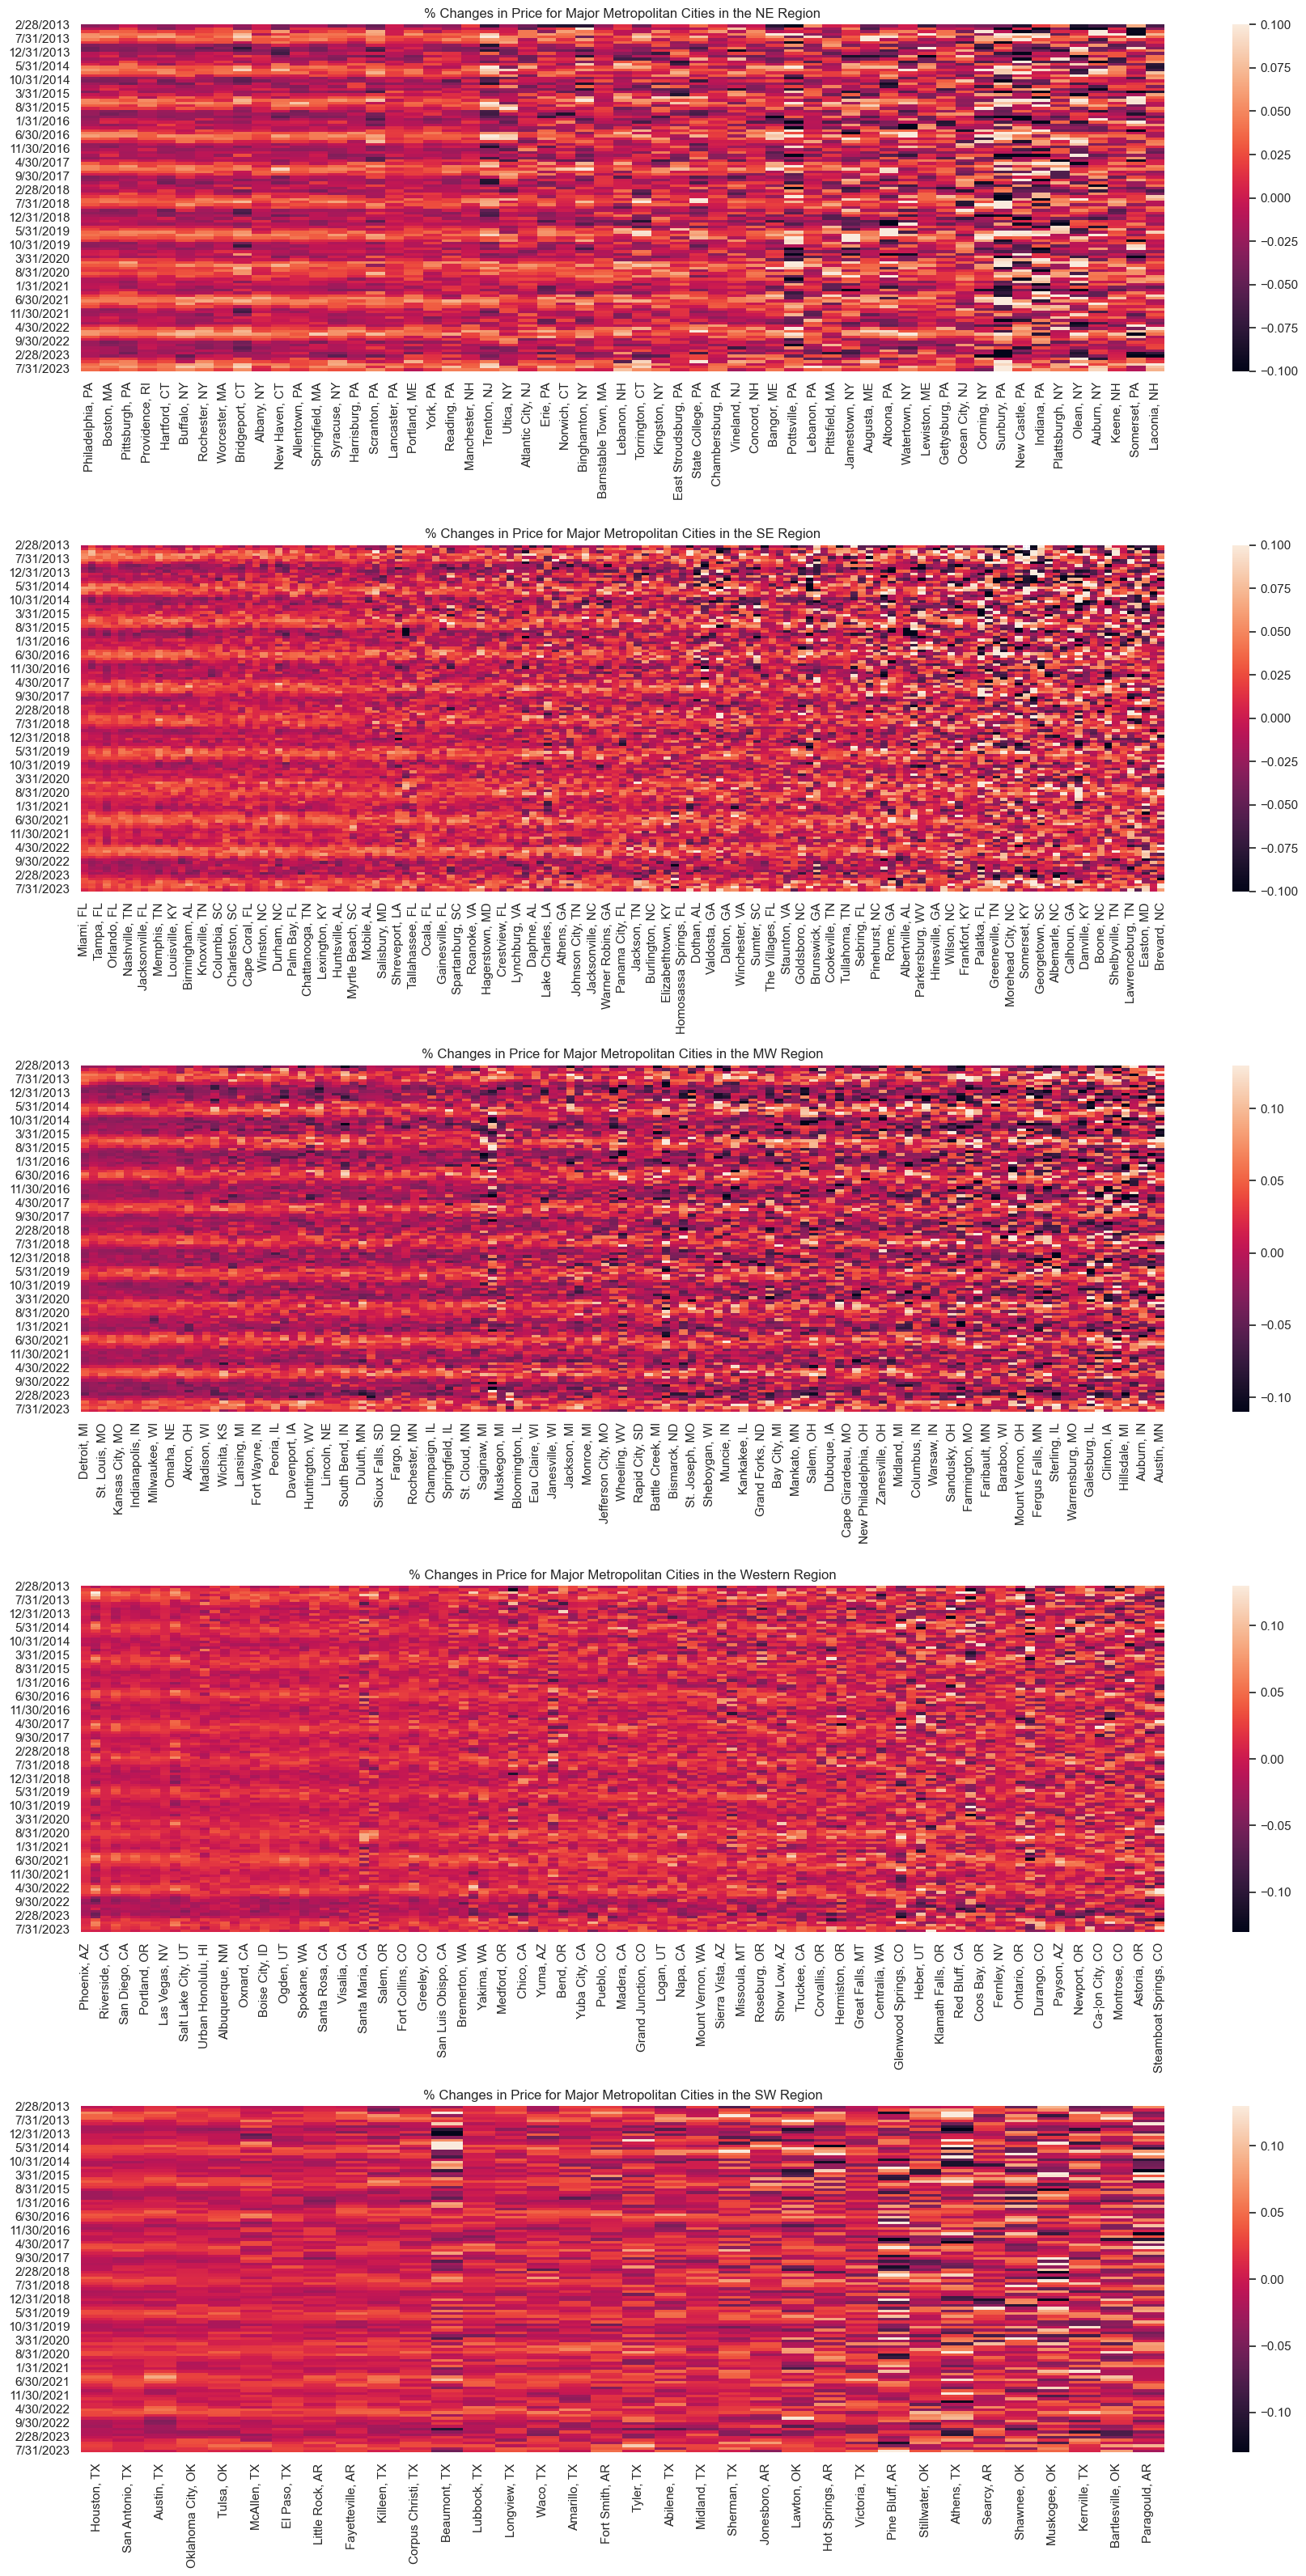

In [15]:
fig2, ax2 = plt.subplots(5,1, figsize=(18,32))
sns.heatmap(df_ne_pct.iloc[:, 1:], ax=ax2[0], vmin=-0.1, vmax=0.1)
ax2[0].set_title("% Changes in Price for Major Metropolitan Cities in the NE Region")
ax2[0].set_xlabel("")
sns.heatmap(df_se_pct.iloc[:, 1:], ax=ax2[1], vmin=-0.1, vmax=0.1)
ax2[1].set_title("% Changes in Price for Major Metropolitan Cities in the SE Region")
ax2[1].set_xlabel("")
sns.heatmap(df_mw_pct.iloc[:, 1:], ax=ax2[2], vmin=-0.11, vmax=0.13)
ax2[2].set_title("% Changes in Price for Major Metropolitan Cities in the MW Region")
ax2[2].set_xlabel("")
sns.heatmap(df_w_pct.iloc[:, 1:], ax=ax2[3], vmin=-0.13, vmax=0.13)
ax2[3].set_title("% Changes in Price for Major Metropolitan Cities in the Western Region")
ax2[3].set_xlabel("")
sns.heatmap(df_sw_pct.iloc[:, 1:], ax=ax2[4], vmin=-0.13, vmax=0.13)
ax2[4].set_title("% Changes in Price for Major Metropolitan Cities in the SW Region")
ax2[4].set_xlabel("")
plt.tight_layout()
fig2.savefig('Images/Volatility/variability_heatmap.svg', dpi=144, bbox_inches='tight')

# Heatmap Conclusions
* Larger, populous cities display a pattern of seasonality, largest percent increases peaking around April and largest percent decreasing around October to Christmas
* Hypothesis test needed

-----

In [16]:
# Inspection - outliers present
alabama_pct = df_pct[df_pct['StateName'] == 'AL']

In [17]:
# Inspection - outliers present
newmexico_pct = df_pct[df_pct['StateName'] == 'NM']

In [18]:
# Outlier Removal
df_pct_dropped_outliers = df_pct[df_pct['RegionName'] != 'Anniston, AL']
df_pct_dropped_outliers = df_pct_dropped_outliers[df_pct_dropped_outliers['RegionName'] != 'Roswell, NM']

In [19]:
# Group states and calculate variance
df_pct_groupby_state_var = df_pct_dropped_outliers.iloc[:,1:].groupby('StateName').agg(['var']).reset_index()

In [20]:
# Split aggregation chart 
df_pct_groupby_ne, df_pct_groupby_se, df_pct_groupby_mw, df_pct_groupby_w, df_pct_groupby_sw = custom.split_regions(df_pct_groupby_state_var)

In [21]:
# Transpose Variance Table
df_pct_groupby_ne = df_pct_groupby_ne.transpose().reset_index(drop=False)
df_pct_groupby_se = df_pct_groupby_se.transpose().reset_index(drop=False)
df_pct_groupby_mw = df_pct_groupby_mw.transpose().reset_index(drop=False)
df_pct_groupby_w = df_pct_groupby_w.transpose().reset_index(drop=False)
df_pct_groupby_sw = df_pct_groupby_sw.transpose().reset_index(drop=False)

In [22]:
# Cleaning Variance Table
df_pct_groupby_ne.columns = ['Dates', 'agg', 'CT', 'MA', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI']
df_pct_groupby_ne = df_pct_groupby_ne.drop('agg', axis=1).iloc[1:,:]

df_pct_groupby_se.columns = ['Dates', 'agg', 'AL', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']
df_pct_groupby_se = df_pct_groupby_se.drop('agg', axis=1).iloc[1:,:]

df_pct_groupby_mw.columns = ['Dates', 'agg', 'IA', 'IL', 'IN', 'KS', 'MI', 'MN', 'MO', 'ND', 'NE', 'OH', 'SD', 'WI']
df_pct_groupby_mw = df_pct_groupby_mw.drop('agg', axis=1).iloc[1:,:]

df_pct_groupby_w.columns = ['Dates', 'agg', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']
df_pct_groupby_w = df_pct_groupby_w.drop('agg', axis=1).iloc[1:,:]

df_pct_groupby_sw.columns = ['Dates', 'agg', 'AR', 'OK', 'TX']
df_pct_groupby_sw = df_pct_groupby_sw.drop('agg', axis=1).iloc[1:,:]

In [23]:
# Convert Dates Column to Date Time instead of Object
df_pct_groupby_ne['Dates'] = pd.to_datetime(df_pct_groupby_ne['Dates'])
df_pct_groupby_ne.set_index('Dates', inplace=True)
df_pct_groupby_se['Dates'] = pd.to_datetime(df_pct_groupby_se['Dates'])
df_pct_groupby_se.set_index('Dates', inplace=True)
df_pct_groupby_mw['Dates'] = pd.to_datetime(df_pct_groupby_mw['Dates'])
df_pct_groupby_mw.set_index('Dates', inplace=True)
df_pct_groupby_w['Dates'] = pd.to_datetime(df_pct_groupby_w['Dates'])
df_pct_groupby_w.set_index('Dates', inplace=True)
df_pct_groupby_sw['Dates'] = pd.to_datetime(df_pct_groupby_sw['Dates'])
df_pct_groupby_sw.set_index('Dates', inplace=True)

In [24]:
df_pct_groupby_ne

,CT,MA,ME,NH,NJ,NY,PA,RI
Dates,,,,,,,,
2013-02-28,0.000505,0.000163,0.000426,0.001533,0.000639,0.001341,0.001931,NaN
2013-03-31,0.00066,0.000336,0.001785,0.000326,0.002983,0.003222,0.002292,NaN
2013-04-30,0.001002,0.000693,0.000518,0.000644,0.001314,0.00197,0.002253,NaN
2013-05-31,0.00051,0.00057,0.002875,0.001922,0.000435,0.00183,0.004914,NaN
2013-06-30,0.000455,0.001587,0.002146,0.000115,0.005524,0.000682,0.001587,NaN
...,...,...,...,...,...,...,...,...
2023-03-31,0.000554,0.000466,0.000283,0.000082,0.000112,0.001797,0.000768,NaN
2023-04-30,0.001113,0.000175,0.002389,0.001669,0.000871,0.00091,0.000925,NaN
2023-05-31,0.000372,0.000544,0.000271,0.003957,0.000846,0.001244,0.000658,NaN


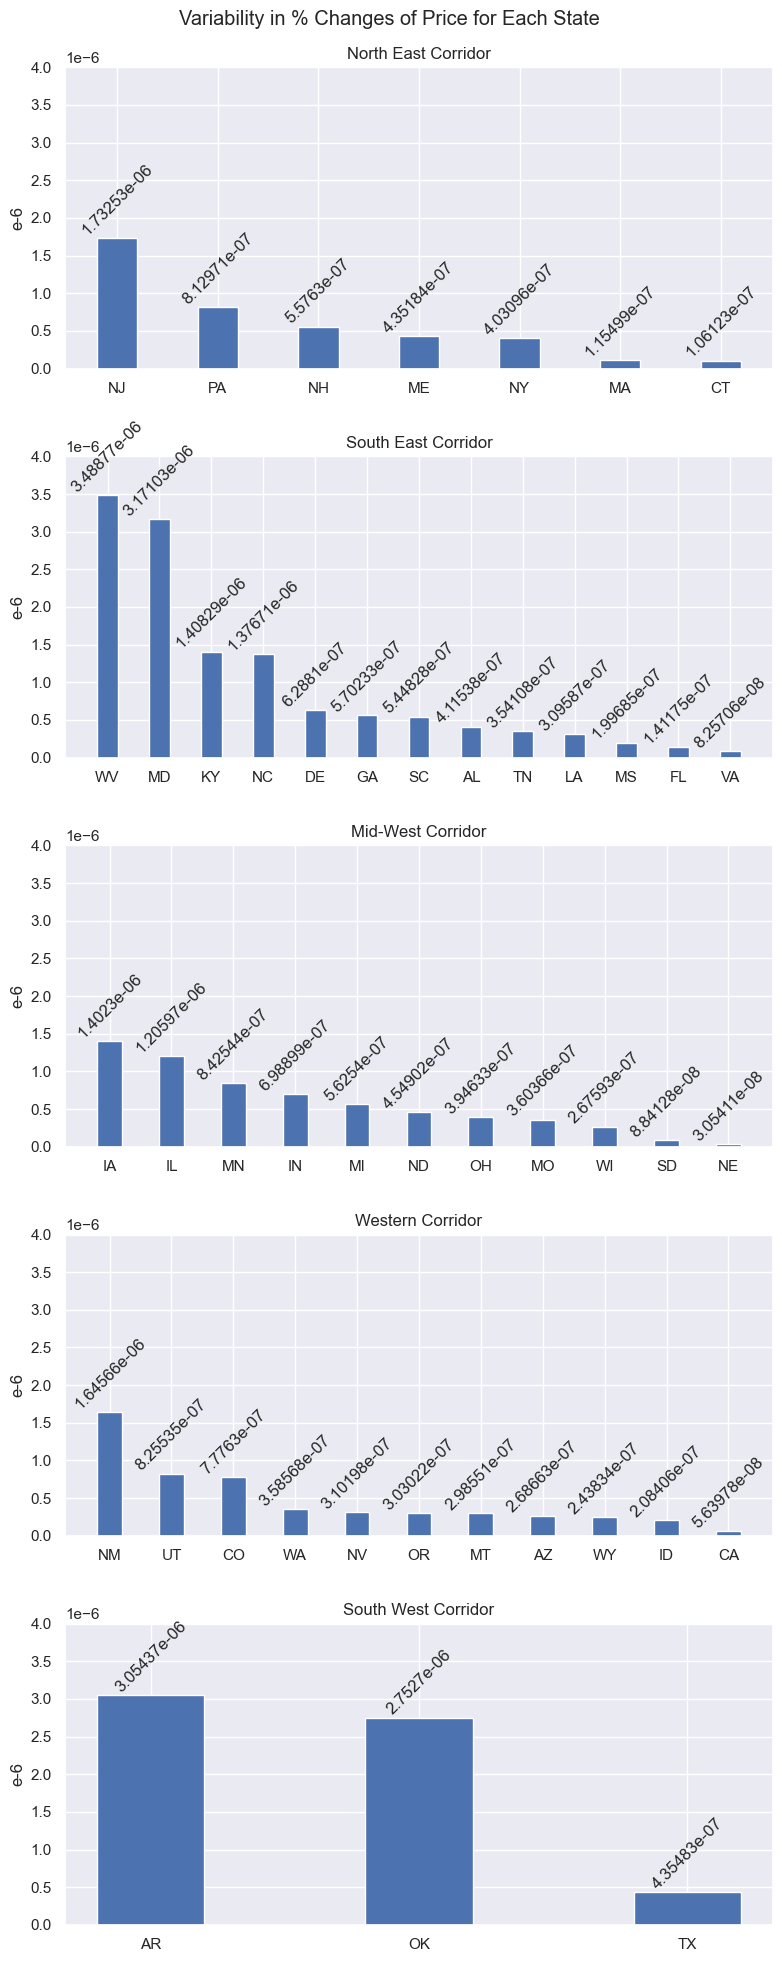

In [25]:
# Sort by variance 
df_pct_groupby_var_ne = df_pct_groupby_ne.var().sort_values(ascending=False)
df_pct_groupby_var_se = df_pct_groupby_se.var().sort_values(ascending=False)
df_pct_groupby_var_mw = df_pct_groupby_mw.var().sort_values(ascending=False)
df_pct_groupby_var_w = df_pct_groupby_w.var().sort_values(ascending=False).drop('HI', axis=0)
df_pct_groupby_var_sw = df_pct_groupby_sw.var().sort_values(ascending=False)

# Box plots
# fig3, ax3 = plt.subplots(5,1, figsize=(10,30))
# ax3[0].boxplot(df_pct_groupby_ne, vert=False, patch_artist=True, widths=0.4, labels=df_pct_groupby_var_ne.index)
# ax3[0].set_xlim(-0.001, 0.013)
# ax3[0].set_title("States in the North East with highest Volatility")
# ax3[1].boxplot(df_pct_groupby_se, vert=False, patch_artist=True, widths=0.4, labels=df_pct_groupby_var_se.index)
# ax3[1].set_xlim(-0.001, 0.013)
# ax3[1].set_title("States in the South East with highest Volatility")
# ax3[2].boxplot(df_pct_groupby_mw, vert=False, patch_artist=True, widths=0.4, labels=df_pct_groupby_var_mw.index)
# ax3[2].set_xlim(-0.001, 0.013)
# ax3[2].set_title("States in the Mid West with highest Volatility")
# ax3[3].boxplot(df_pct_groupby_w, vert=False, patch_artist=True, widths=0.4, labels=df_pct_groupby_var_w.index)
# ax3[3].set_xlim(-0.001, 0.013)
# ax3[3].set_title("States in the West East with highest Volatility")
# ax3[4].boxplot(df_pct_groupby_sw, vert=False, patch_artist=True, widths=0.1, labels=df_pct_groupby_var_sw.index)
# ax3[4].set_xlim(-0.001, 0.013)
# ax3[4].set_title("States in the South West with highest Volatility")
# ax3[4].set_xlabel("Variance")
# AL 0.000217945
# NM 3.78127-05

# Histograms
fig3, ax3 = plt.subplots(5, figsize=(8,20))
fig3.suptitle("Variability in % Changes of Price for Each State \n")
ax3[0].bar(x=df_pct_groupby_var_ne.index, height=df_pct_groupby_var_ne, width=0.4)
ax3[0].set_ylim(0,.000004)
ax3[0].set_ylabel("e-6")
ax3[0].set_title('North East Corridor')
# ax3[0].savefig('variability_ne.svg', dpi=144, bbox_inches='tight')
ax3[1].bar(x=df_pct_groupby_var_se.index, height=df_pct_groupby_var_se, width=0.4)
ax3[1].set_ylim(0,.000004)
ax3[1].set_ylabel("e-6")
ax3[1].set_title('South East Corridor')
# ax3[1].savefig('variability_se.svg', dpi=144, bbox_inches='tight')
# ax3[1].annotate("0.000217945", xy=(0.05,0.00001), xytext=(0.5,0.0000090), arrowprops=dict(arrowstyle='-', lw=1.5, color='red'))
ax3[2].bar(x=df_pct_groupby_var_mw.index, height=df_pct_groupby_var_mw, width=0.4)
ax3[2].set_ylim(0,.000004)
ax3[2].set_ylabel("e-6")
ax3[2].set_title('Mid-West Corridor')
# ax3[2].savefig('variability_mw.svg', dpi=144, bbox_inches='tight')
ax3[3].bar(x=df_pct_groupby_var_w.index, height=df_pct_groupby_var_w, width=0.4)
ax3[3].set_ylim(0,.000004)
ax3[3].set_ylabel("e-6")
ax3[3].set_title('Western Corridor')
# ax3[3].savefig('variability_w.svg', dpi=144, bbox_inches='tight')
# ax3[3].annotate("3.78127-05", xy=(0.05,0.00001), xytext=(0.5,0.0000090), arrowprops=dict(arrowstyle='-', lw=1.5, color='red'))
ax3[4].bar(x=df_pct_groupby_var_sw.index, height=df_pct_groupby_var_sw, width=0.4)
ax3[4].set_ylim(0,.000004)
ax3[4].set_ylabel("e-6")
ax3[4].set_title('South West Corridor')
# ax3[4].savefig('variability_sw.svg', dpi=144, bbox_inches='tight')
for axis in ax3:
    for bar in axis.containers:
        axis.bar_label(bar, label_type='edge', rotation=45)
plt.tight_layout()
fig3.savefig('Images/Volatility/variability_regions.svg', dpi=144, bbox_inches='tight')

In [26]:
# Filter down to only 2022 and 2023
# df_pct_groupby_ne_2023 = df_pct_groupby_ne.loc[(df_pct_groupby_ne.index.year == 2022) | (df_pct_groupby_ne.index.year == 2023)]
# df_pct_groupby_se_2023 = df_pct_groupby_se.loc[(df_pct_groupby_se.index.year == 2022) | (df_pct_groupby_se.index.year == 2023)]
# df_pct_groupby_mw_2023 = df_pct_groupby_mw.loc[(df_pct_groupby_mw.index.year == 2022) | (df_pct_groupby_mw.index.year == 2023)]
# df_pct_groupby_w_2023 = df_pct_groupby_w.loc[(df_pct_groupby_w.index.year == 2022) | (df_pct_groupby_w.index.year == 2023)]
# df_pct_groupby_sw_2023 = df_pct_groupby_sw.loc[(df_pct_groupby_sw.index.year == 2022) | (df_pct_groupby_sw.index.year == 2023)]
# Commented out, added a script to fitler dates
df_pct_groupby_ne_2020 = custom.get_specific_date_range(df_pct_groupby_ne, '7/1/2019', '7/1/2020')
df_pct_groupby_se_2020 = custom.get_specific_date_range(df_pct_groupby_se, '7/1/2019', '7/1/2020')
df_pct_groupby_mw_2020 = custom.get_specific_date_range(df_pct_groupby_mw, '7/1/2019', '7/1/2020')
df_pct_groupby_w_2020 = custom.get_specific_date_range(df_pct_groupby_w, '7/1/2019', '7/1/2020')
df_pct_groupby_sw_2020 = custom.get_specific_date_range(df_pct_groupby_sw, '7/1/2019', '7/1/2020')

df_pct_groupby_ne_2021 = custom.get_specific_date_range(df_pct_groupby_ne, '7/1/2020', '7/1/2021')
df_pct_groupby_se_2021 = custom.get_specific_date_range(df_pct_groupby_se, '7/1/2020', '7/1/2021')
df_pct_groupby_mw_2021 = custom.get_specific_date_range(df_pct_groupby_mw, '7/1/2020', '7/1/2021')
df_pct_groupby_w_2021 = custom.get_specific_date_range(df_pct_groupby_w, '7/1/2020', '7/1/2021')
df_pct_groupby_sw_2021 = custom.get_specific_date_range(df_pct_groupby_sw, '7/1/2020', '7/1/2021')

df_pct_groupby_ne_2022 = custom.get_specific_date_range(df_pct_groupby_ne, '7/1/2021', '7/1/2022')
df_pct_groupby_se_2022 = custom.get_specific_date_range(df_pct_groupby_se, '7/1/2021', '7/1/2022')
df_pct_groupby_mw_2022 = custom.get_specific_date_range(df_pct_groupby_mw, '7/1/2021', '7/1/2022')
df_pct_groupby_w_2022 = custom.get_specific_date_range(df_pct_groupby_w, '7/1/2021', '7/1/2022')
df_pct_groupby_sw_2022 = custom.get_specific_date_range(df_pct_groupby_sw, '7/1/2021', '7/1/2022')

df_pct_groupby_ne_2023 = custom.get_specific_date_range(df_pct_groupby_ne, '7/1/2022', '7/1/2023')
df_pct_groupby_se_2023 = custom.get_specific_date_range(df_pct_groupby_se, '7/1/2022', '7/1/2023')
df_pct_groupby_mw_2023 = custom.get_specific_date_range(df_pct_groupby_mw, '7/1/2022', '7/1/2023')
df_pct_groupby_w_2023 = custom.get_specific_date_range(df_pct_groupby_w, '7/1/2022', '7/1/2023')
df_pct_groupby_sw_2023 = custom.get_specific_date_range(df_pct_groupby_sw, '7/1/2022', '7/1/2023')

In [27]:
# Generate Means 
# Get Averages per corridor
# df_pct_groupby_ne['mean'] = df_pct_groupby_ne.mean(axis=1)
# df_pct_groupby_se['mean'] = df_pct_groupby_se.mean(axis=1)
# df_pct_groupby_mw['mean'] = df_pct_groupby_mw.mean(axis=1)
# df_pct_groupby_w['mean'] = df_pct_groupby_w.mean(axis=1)
# df_pct_groupby_sw['mean'] = df_pct_groupby_sw.mean(axis=1)

# Plot again
# fig4, ax4 = plt.subplots(4,1, figsize=(15,30))
# ax4[0].plot(df_pct_groupby_ne_2020.index, df_pct_groupby_ne_2020['mean'], label='NE States', color='blue')
# ax4[0].plot(df_pct_groupby_se_2020.index, df_pct_groupby_se_2020['mean'], label='SE States', color='red')
# ax4[0].plot(df_pct_groupby_mw_2020.index, df_pct_groupby_mw_2020['mean'], label='MW States', color='yellow')
# ax4[0].plot(df_pct_groupby_w_2020.index, df_pct_groupby_w_2020['mean'], label='W States', color='green')
# ax4[0].plot(df_pct_groupby_sw_2020.index, df_pct_groupby_sw_2020['mean'], label='SW States', color='purple')
# ax4[0].set_ylim(0, 0.003)
# ax4[0].legend()

# ax4[1].plot(df_pct_groupby_ne_2021.index, df_pct_groupby_ne_2021['mean'], label='NE States', color='blue')
# ax4[1].plot(df_pct_groupby_se_2021.index, df_pct_groupby_se_2021['mean'], label='SE States', color='red')
# ax4[1].plot(df_pct_groupby_mw_2021.index, df_pct_groupby_mw_2021['mean'], label='MW States', color='yellow')
# ax4[1].plot(df_pct_groupby_w_2021.index, df_pct_groupby_w_2021['mean'], label='W States', color='green')
# ax4[1].plot(df_pct_groupby_sw_2021.index, df_pct_groupby_sw_2021['mean'], label='SW States', color='purple')
# ax4[1].set_ylim(0, 0.003)
# ax4[1].legend()

# ax4[2].plot(df_pct_groupby_ne_2022.index, df_pct_groupby_ne_2022['mean'], label='NE States', color='blue')
# ax4[2].plot(df_pct_groupby_se_2022.index, df_pct_groupby_se_2022['mean'], label='SE States', color='red')
# ax4[2].plot(df_pct_groupby_mw_2022.index, df_pct_groupby_mw_2022['mean'], label='MW States', color='yellow')
# ax4[2].plot(df_pct_groupby_w_2022.index, df_pct_groupby_w_2022['mean'], label='W States', color='green')
# ax4[2].plot(df_pct_groupby_sw_2022.index, df_pct_groupby_sw_2022['mean'], label='SW States', color='purple')
# ax4[2].set_ylim(0, 0.003)
# ax4[2].legend()

# ax4[3].plot(df_pct_groupby_ne_2023.index, df_pct_groupby_ne_2023['mean'], label='NE States', color='blue')
# ax4[3].plot(df_pct_groupby_se_2023.index, df_pct_groupby_se_2023['mean'], label='SE States', color='red')
# ax4[3].plot(df_pct_groupby_mw_2023.index, df_pct_groupby_mw_2023['mean'], label='MW States', color='yellow')
# ax4[3].plot(df_pct_groupby_w_2023.index, df_pct_groupby_w_2023['mean'], label='W States', color='green')
# ax4[3].plot(df_pct_groupby_sw_2023.index, df_pct_groupby_sw_2023['mean'], label='SW States', color='purple')
# ax4[3].set_ylim(0, 0.003)
# ax4[3].legend()

# fig4.suptitle("Variances in Regional Housing Markets")
# plt.tight_layout()


In [28]:
# Calculate means of means across the year
# Which corridor is the most stable/ volatile
# Narrow it down to states
# Narrow it down to city

In [29]:
# Getting the top 10 and bottom 10 states ranked by overall variance of percentages
df_pct_transposed = df_pct.transpose().reset_index(drop=False)

In [30]:
df_pct_transposed

,index,0,1,2,3,4,5,6,7,8,...,465,466,467,468,469,470,471,472,473,474
0,RegionName,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA",...,"Auburn, IN","McMinnville, TN","Astoria, OR","Big Rapids, MI","Austin, MN","Easton, MD","Kill Devil Hills, NC","Brevard, NC","Breckenridge, CO","Steamboat Springs, CO"
1,StateName,NY,CA,IL,TX,TX,VA,PA,FL,GA,...,IN,TN,OR,MI,MN,MD,NC,NC,CO,CO
2,2/28/2013,-0.016123,0.008459,-0.029681,0.003297,-0.008416,-0.01133,-0.030511,-0.0102,0.021717,...,0.008391,-0.058367,0.050254,-0.09377,-0.041494,-0.068067,-0.072464,0.019694,0.081559,0.044971
3,3/31/2013,-0.011787,0.025168,0.014038,0.020806,0.012337,0.015625,-0.00853,0.00412,0.037931,...,0.062546,-0.092789,0.048501,0.097521,0.043153,0.253566,-0.081164,0.012876,0.022241,-0.06531
4,4/30/2013,-0.005466,0.057285,0.062415,0.059015,0.064825,0.046154,0.019355,0.043121,0.075302,...,0.035544,0.06948,0.052983,0.176853,0.149439,-0.00946,-0.127539,-0.042369,-0.02901,-0.001852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,3/31/2023,0.001635,0.01306,0.024658,0.01288,0.006572,0.029397,0.006601,0.028201,0.010662,...,-0.037207,0.026512,-0.063326,-0.021538,0.100357,-0.028982,0.030419,-0.127882,-0.075571,-0.202897
124,4/30/2023,0.012412,0.014102,0.042328,0.027248,0.022851,0.056901,0.01858,0.025862,0.030688,...,0.145401,0.131267,-0.018394,0.015723,-0.020168,-0.025582,-0.021751,0.029807,0.033356,0.034002
125,5/31/2023,0.037095,0.017878,0.045249,0.020337,0.026598,0.046414,0.037551,0.021697,0.024376,...,0.071253,0.019516,0.048902,0.031994,0.023785,0.056663,0.002222,0.109711,-0.044089,0.055113
126,6/30/2023,0.041991,0.022638,0.042847,0.026862,0.021762,0.032791,0.046536,0.022432,0.028155,...,0.017509,0.067622,0.007952,0.090996,0.032331,0.084933,0.001586,0.109381,0.027152,0.108879


In [31]:
# Capture Tranposed names
df_pct_transposed_names_unsorted =  df_pct_transposed.iloc[0,:]
df_pct_transposed = df_pct_transposed.drop([0,1], axis=0)
df_pct_transposed.columns = df_pct_transposed_names_unsorted.replace({'RegionName': 'Dates'})
df_pct_transposed['Dates'] = pd.to_datetime(df_pct_transposed['Dates'])
df_pct_transposed.set_index('Dates', inplace=True)

In [32]:
# Rank Cities by variance and sort
df_pct_transposed_sort_ascending = df_pct_transposed.var().sort_values(ascending=True)
df_pct_transposed_sort_decending = df_pct_transposed.var().sort_values(ascending=False)
variance_pct_top_ten = df_pct_transposed_sort_ascending.iloc[:10].index
variance_pct_bottom_ten = df_pct_transposed_sort_decending.iloc[:10].index
# Convert to LongFloat for accuracy
# df_pct_transposed_sort_ascending_array = np.longfloat(df_pct_transposed_sort_ascending)
# df_pct_transposed_sort_decending_array = np.longfloat(df_pct_transposed_sort_decending)
# Filter transposed df so it only plots cities within the top/bottom 10 ranks
df_pct_transposed_sort_ascending_filtered = df_pct_transposed.loc[:, df_pct_transposed.columns.isin(variance_pct_top_ten)]
df_pct_transposed_sort_decending_filtered = df_pct_transposed.loc[:, df_pct_transposed.columns.isin(variance_pct_bottom_ten)]

print('Cities with the lowest Variance %')
print(df_pct_transposed_sort_ascending.iloc[:10])
print('==================================')
print('Cities with the highest Variance %')
print(df_pct_transposed_sort_decending.iloc[:10])
print('==================================')

Cities with the lowest Variance %
0
Riverside, CA      0.000114
Las Vegas, NV      0.000122
Deltona, FL        0.000147
Phoenix, AZ        0.000151
Tucson, AZ         0.000163
Greeley, CO        0.000166
Salem, OR          0.000172
Provo, UT          0.000182
San Diego, CA      0.000183
Los Angeles, CA    0.000183
dtype: object
Cities with the highest Variance %
0
Anniston, AL            0.016592
Sunbury, PA             0.007498
Roswell, NM             0.006323
Cullowhee, NC           0.006022
Elizabeth City, NC      0.005519
Indiana, PA             0.005264
North Wilkesboro, NC    0.005264
Pine Bluff, AR          0.005257
Athens, TX               0.00521
Carbondale, IL          0.005112
dtype: object


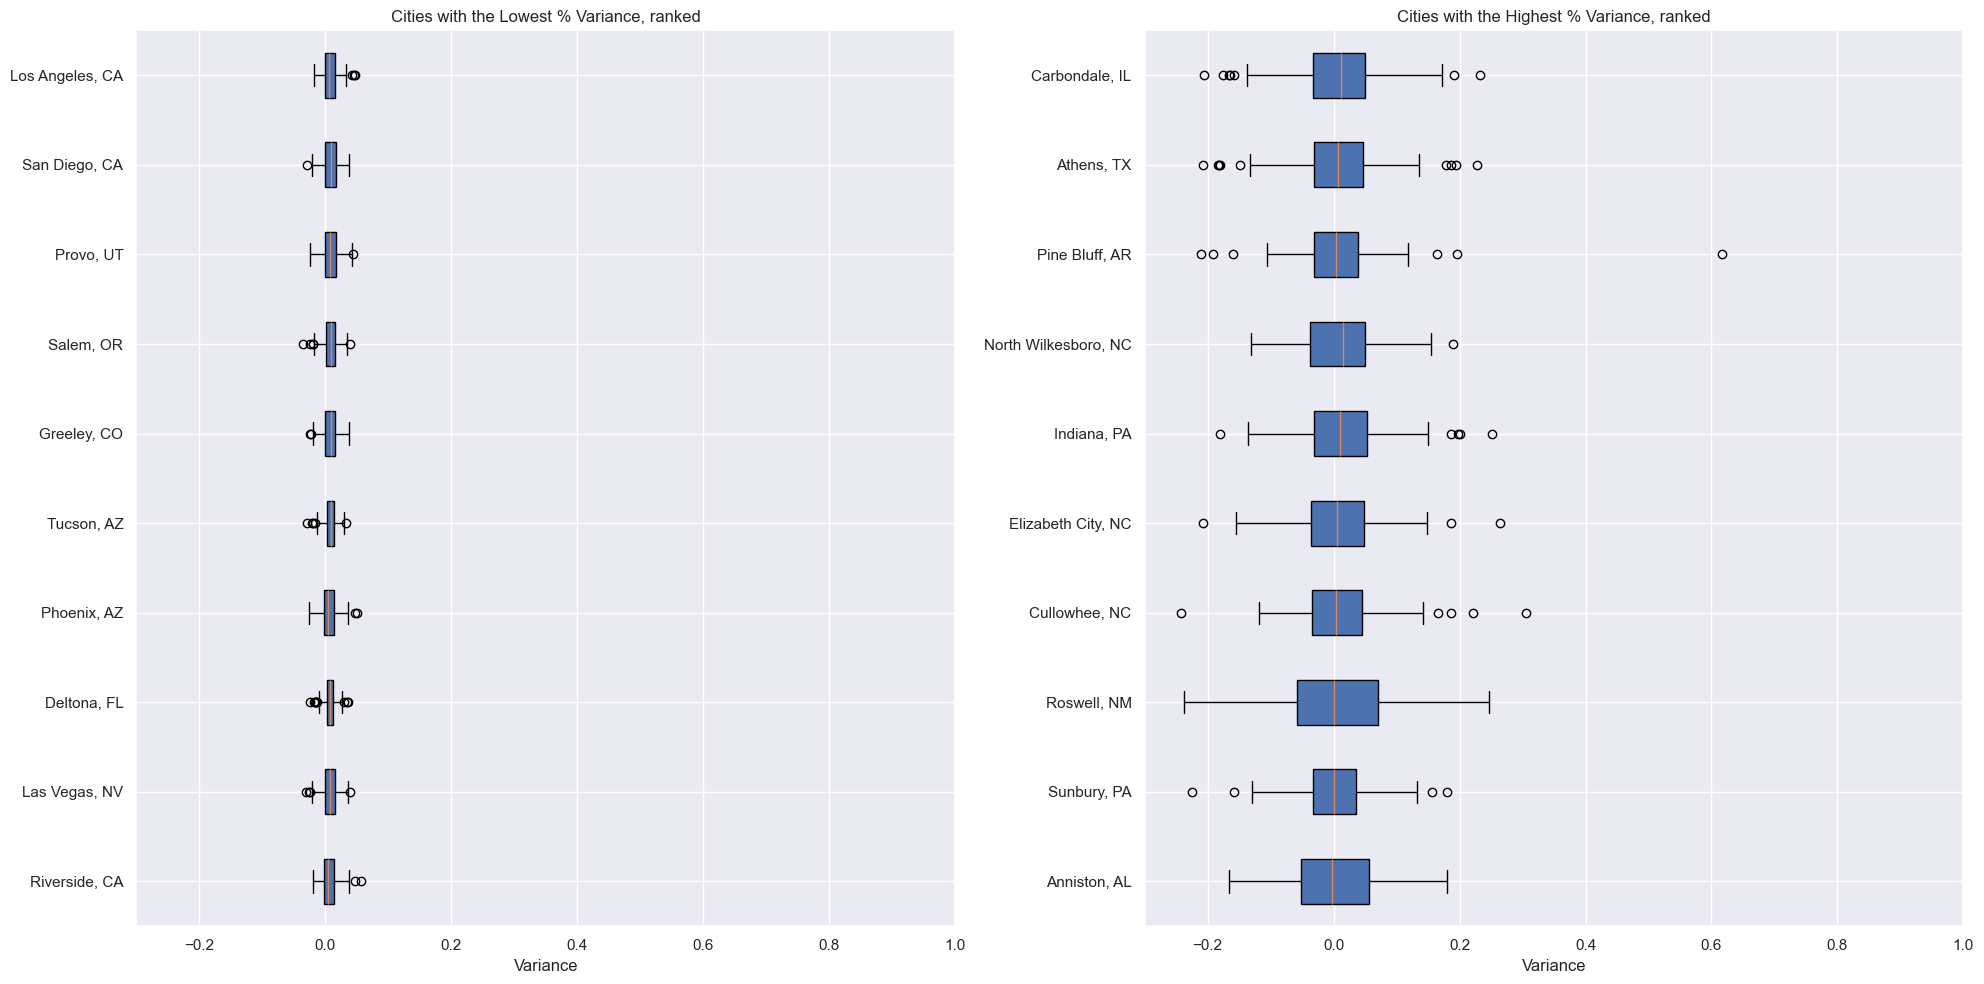

In [33]:
fig4, ax4 = plt.subplots(1,2, figsize=(20,10))
ax4[0].boxplot(df_pct_transposed_sort_ascending_filtered, vert=False, patch_artist=True, labels=variance_pct_top_ten)
ax4[0].set_xlim(-0.3, 1)
ax4[0].set_title("Cities with the Lowest % Variance, ranked")
ax4[0].set_xlabel("Variance")
ax4[1].boxplot(df_pct_transposed_sort_decending_filtered, vert=False, patch_artist=True, labels=variance_pct_bottom_ten)
ax4[1].set_xlim(-0.3, 1)
ax4[1].set_title("Cities with the Highest % Variance, ranked")
ax4[1].set_xlabel("Variance")
plt.tight_layout()
fig4.savefig('Images/Volatility/variabity_top_bottom.svg', dpi=144, bbox_inches='tight')

In [34]:
# Calculate monthly % Changes
monthly_dfs = []
for month in range(1, 13):
    monthly_dfs.append(df_pct_transposed.loc[df_pct_transposed.index.month == month].mean())

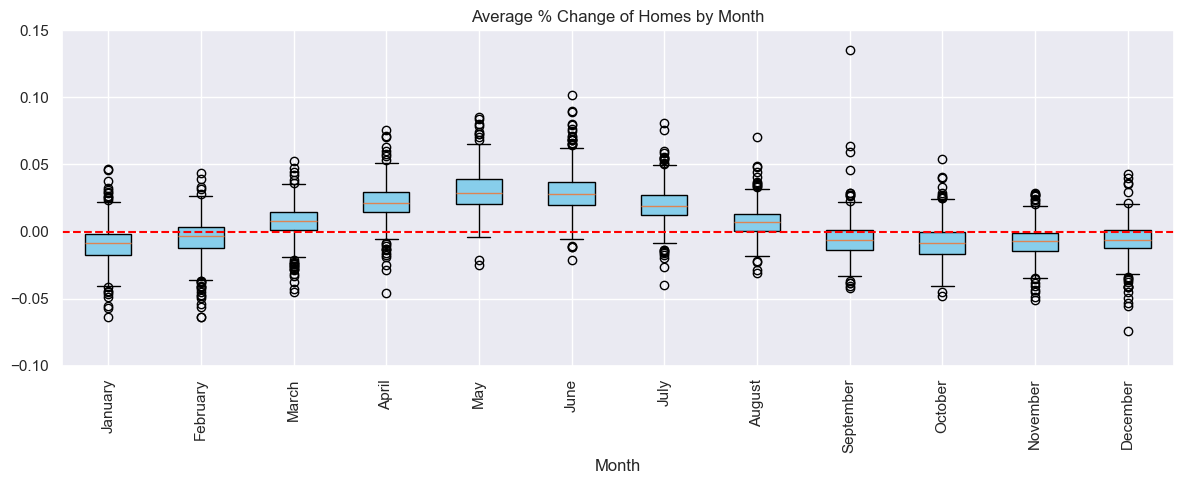

In [35]:
# Plot monthly changes
# data_list = [monthly_dfs[1][col].dropna() for col in monthly_dfs[1]]
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig5, ax5 = plt.subplots(1, figsize=(12,5))
ax5.boxplot(monthly_dfs, vert=True, patch_artist=True, labels=months_list, boxprops=dict(facecolor='skyblue', color='black'))
ax5.set_ylim(-0.1, 0.15)
ax5.set_xlabel("Month")
ax5.set_xticklabels(labels=months_list, rotation=90)
ax5.axhline(0, linestyle='dashed', color='red')
ax5.set_title("Average % Change of Homes by Month")
plt.tight_layout()
fig5.savefig('Images/Volatility/avg_price_change_by_month.svg', dpi=144, format='svg')
plt.show()